<a href="https://colab.research.google.com/github/vvrgit/EV_Scheduling/blob/main/EVCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EV Charging Management.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Python Libraries.
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import math as mt
import random
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load Data.
data = pd.read_csv('/content/drive/MyDrive/EV Scheduling/EV_test_data_2.csv')
data.head()

,PM,BL,PS,NS,Rec
0,0.619441,0.626747,1,1,0
1,0.619392,0.679598,1,0,0
2,0.619388,0.561117,0,1,0
3,0.619341,0.140074,0,1,0
4,0.619321,0.958041,1,0,0


In [ ]:
# Creation of Dummy Variables.
df3 = pd.get_dummies(data, columns = ['Rec'], dtype='int')
display(df3)
data=df3
data.head()

,PM,BL,PS,NS,Rec_0,Rec_1,Rec_2
0,0.619441,0.626747,1,1,1,0,0
1,0.619392,0.679598,1,0,1,0,0
2,0.619388,0.561117,0,1,1,0,0
3,0.619341,0.140074,0,1,1,0,0
4,0.619321,0.958041,1,0,1,0,0
...,...,...,...,...,...,...,...
72957,0.565159,0.146952,1,0,1,0,0
72958,0.555188,0.588468,0,0,0,0,1
72959,0.547164,0.341833,1,0,1,0,0
72960,5.536234,0.588334,0,0,0,0,1


,PM,BL,PS,NS,Rec_0,Rec_1,Rec_2
0,0.619441,0.626747,1,1,1,0,0
1,0.619392,0.679598,1,0,1,0,0
2,0.619388,0.561117,0,1,1,0,0
3,0.619341,0.140074,0,1,1,0,0
4,0.619321,0.958041,1,0,1,0,0


In [ ]:
# Data Description.
data.describe()

,PM,BL,PS,NS,Rec_0,Rec_1,Rec_2
count,72962.000000,72962.000000,72962.000000,72962.000000,72962.000000,72962.000000,72962.000000
mean,1.004430,0.550434,0.500014,0.499397,0.646432,0.104452,0.249116
std,0.436763,0.259836,0.500003,0.500003,0.478080,0.305848,0.432504
min,0.132479,0.100017,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.689841,0.325653,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.905177,0.550157,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.206788,0.775946,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.536234,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = data.iloc[:,0:4].values
y = data.iloc[:,4:7].values
print(x.shape)
print(y.shape)

(72962, 4)
(72962, 3)


In [ ]:
print(x)
print('--------------')
print(y)

[[0.61944097 0.62674672 1.         1.        ]
 [0.61939244 0.67959786 1.         0.        ]
 [0.61938805 0.56111724 0.         1.        ]
 ...
 [0.54716397 0.3418333  1.         0.        ]
 [5.536234   0.58833435 0.         0.        ]
 [0.13247851 0.73139603 0.         0.        ]]
--------------
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 0 1]
 [0 0 1]]


In [ ]:
# Splitting of Data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(58369, 4)

In [ ]:
# Model Creation.
model = Sequential()
model.add(Dense(5,activation='swish', input_shape=(4,)))
model.add(Dense(3,activation='softmax')) #output Layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model Compiling.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs.
# Model Development.
history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=10,verbose=1)

Epoch 1/10
1825/1825 [==============================] - 8s 3ms/step - loss: 0.4183 - accuracy: 0.8467
Epoch 2/10
1825/1825 [==============================] - 3s 1ms/step - loss: 0.1354 - accuracy: 0.9551
Epoch 3/10
1825/1825 [==============================] - 3s 2ms/step - loss: 0.0940 - accuracy: 0.9706
Epoch 4/10
1825/1825 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9770
Epoch 5/10
1825/1825 [==============================] - 3s 1ms/step - loss: 0.0666 - accuracy: 0.9814
Epoch 6/10
1825/1825 [==============================] - 3s 1ms/step - loss: 0.0594 - accuracy: 0.9846
Epoch 7/10
1825/1825 [==============================] - 3s 1ms/step - loss: 0.0539 - accuracy: 0.9868
Epoch 8/10
1825/1825 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9881
Epoch 9/10
1825/1825 [==============================] - 5s 2ms/step - loss: 0.0455 - accuracy: 0.9899
Epoch 10/10
1825/1825 [==============================] - 3s 1ms/step - loss: 0.042

In [ ]:
# Testing Accuracy
score = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', score[1])


457/457 - 1s - loss: 0.0418 - accuracy: 0.9844 - 996ms/epoch - 2ms/step
Test accuracy: 0.9844446182250977


In [ ]:
# Save the model.
model.save("my_model_EV_swish_1-layer_5-neurons_Adagrad.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Visualization.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from keras.models import load_model
model = load_model('/content/my_model_EV_swish_1-layer_5-neurons_Adagrad.h5')
total_X = data.iloc[:,0:4].values
total_Y = data.iloc[:, 4:7].values

# Assuming you have your predicted and actual values stored in lists or arrays
predicted_values = model.predict(total_X)  # List or array containing predicted values
actual_values = total_Y  # List or array containing actual values


2281/2281 [==============================] - 4s 2ms/step


In [ ]:
print(predicted_values.shape)
print(actual_values.shape)

(72962, 3)
(72962, 3)


In [ ]:
# saving the predicted and actual values into excel file.
train_df = pd.DataFrame({
    'Actual_Class_1': actual_values[:, 0],
    'Actual_Class_2': actual_values[:, 1],
    'Actual_Class_3': actual_values[:, 2],
    'Predicted_Class_1': predicted_values[:, 0],
    'Predicted_Class_2': predicted_values[:, 1],
    'Predicted_Class_3': predicted_values[:, 2]
})

# Write the DataFrame to an Excel file
train_df.to_excel('training_predictions.xlsx', index=False)

In [ ]:
# loading predicted values.
afc = pd.read_excel('/content/training_predictions.xlsx')
afc.head()

,Actual_Class_1,Actual_Class_2,Actual_Class_3,Predicted_Class_1,Predicted_Class_2,Predicted_Class_3
0,1,0,0,0.986148,0.013852,3.525859e-10
1,1,0,0,0.999982,0.000005,1.237350e-05
2,1,0,0,0.999987,0.000003,9.955676e-06
3,1,0,0,0.999987,0.000002,1.139198e-05
4,1,0,0,0.999978,0.000009,1.288241e-05


In [ ]:
# import visualization libraries.
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
actual = [afc[f'Actual_Class_{i+1}'] for i in range(0,3)]
predicted = [afc[f'Predicted_Class_{i+1}'] for i in range(0,3)]
print(actual)
print(predicted)

[0        1
1        1
2        1
3        1
4        1
        ..
72957    1
72958    0
72959    1
72960    0
72961    0
Name: Actual_Class_1, Length: 72962, dtype: int64, 0        0
1        0
2        0
3        0
4        0
        ..
72957    0
72958    0
72959    0
72960    0
72961    0
Name: Actual_Class_2, Length: 72962, dtype: int64, 0        0
1        0
2        0
3        0
4        0
        ..
72957    0
72958    1
72959    0
72960    1
72961    1
Name: Actual_Class_3, Length: 72962, dtype: int64]
[0        9.861478e-01
1        9.999822e-01
2        9.999873e-01
3        9.999867e-01
4        9.999785e-01
             ...     
72957    9.999815e-01
72958    1.294899e-07
72959    9.999817e-01
72960    5.624546e-02
72961    8.316403e-09
Name: Predicted_Class_1, Length: 72962, dtype: float64, 0        0.013852
1        0.000005
2        0.000003
3        0.000002
4        0.000009
           ...   
72957    0.000003
72958    0.000005
72959    0.000004
72960    0.828226
7296

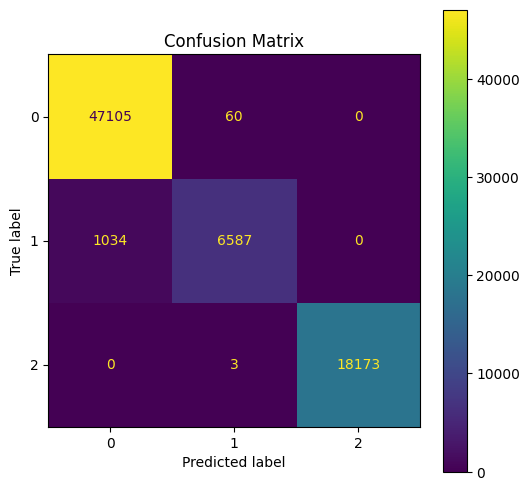

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Read the Excel file into a DataFrame
predicted_values_df = pd.read_excel('/content/training_predictions.xlsx')

# Get the number of classes
num_classes = 3

# Combine actual and predicted values for all classes into single arrays
y_test_all = predicted_values_df[[f'Actual_Class_{i+1}' for i in range(num_classes)]].values
y_pred_all = predicted_values_df[[f'Predicted_Class_{i+1}' for i in range(num_classes)]].values

# Reverse one-hot encoding
y_test_all_original = y_test_all.argmax(axis=1)
y_pred_all_original = y_pred_all.argmax(axis=1)

# Compute confusion matrix
conf_matrix_all = confusion_matrix(y_test_all_original, y_pred_all_original)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_all, display_labels=np.unique(y_test_all_original))
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test_all_original, y_pred_all_original))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47165
           1       0.99      0.86      0.92      7621
           2       1.00      1.00      1.00     18176

    accuracy                           0.98     72962
   macro avg       0.99      0.95      0.97     72962
weighted avg       0.99      0.98      0.98     72962



#Support Vector Regression

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# SVregressor = LinearSVC(multi_class='ovr')
# SVregressor.fit(X_train, y_train)

from sklearn.multiclass import OneVsRestClassifier

# Create a OneVsRestClassifier wrapper for the LinearSVC classifier
clf = OneVsRestClassifier(LinearSVC(multi_class='ovr'))

# Fit the classifier to the training data
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test =  clf.predict(X_test)
y_pred_train =  clf.predict(X_train)
y_pred_test
# Training Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Testing Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8458256951463962
Testing Accuracy: 0.8485575275817172
